Installing and loading the required packages:

In [ ]:
install.packages("dplyr")
install.packages("tidyr")
install.packages("ggplot2")
install.packages("lubridate")
install.packages("readr")
install.packages("janitor")
library(dplyr)
library(tidyr)
library(ggplot2)
library(lubridate)
library(readr)
library(janitor)

Creating data frames for all the csv files:

In [250]:
files_csv <- list.files(path = "bellabeat/", pattern = "*.csv")
files <- substr(files_csv,1,nchar(files_csv)-4)

for(i in files){
  filepath = file.path(paste("bellabeat/",i,".csv", sep = ""))
  assign(i,read_csv(filepath))
}

Rows: 940 Columns: 15
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 10
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinute

Counting the distinct IDs in each data frame to determine how many individuals there were for each data set:

All data sets had 33 individuals, except for:
- heartrate_seconds = 14
- minuteSleep = 24
- sleepDay = 24
- WeightLogInfo = 8

In [251]:
n_distinct(dailyActivity_merged$Id)
n_distinct(dailyCalories_merged$Id)
n_distinct(dailyIntensities_merged$Id)
n_distinct(dailySteps_merged$Id)
n_distinct(heartrate_seconds_merged$Id)
n_distinct(hourlyCalories_merged$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 14

[1] 33

In [252]:
n_distinct(hourlyIntensities_merged$Id)
n_distinct(hourlySteps_merged$Id)
n_distinct(minuteCaloriesNarrow_merged$Id)
n_distinct(minuteCaloriesWide_merged$Id)
n_distinct(minuteIntensitiesNarrow_merged$Id)
n_distinct(minuteIntensitiesWide_merged$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

In [253]:
n_distinct(minuteMETsNarrow_merged$Id)
n_distinct(minuteSleep_merged$Id)
n_distinct(minuteStepsNarrow_merged$Id)
n_distinct(minuteStepsWide_merged$Id)
n_distinct(sleepDay_merged$Id)
n_distinct(weightLogInfo_merged$Id)

[1] 33

[1] 24

[1] 33

[1] 33

[1] 24

[1] 8

## Processing and Analyzing the Daily Activity Data

### Processing the Daily Activity Data:

To familiarise myself with the structure of the data:

In [254]:
str(dailyActivity_merged)

spc_tbl_ [940 x 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

To check for na values and duplicate rows:

In [255]:
sum(is.na(dailyActivity_merged))
sum(duplicated(dailyActivity_merged))

[1] 0

[1] 0

To check for records where the smart device was not worn:

In [256]:
count(dailyActivity_merged, Calories == 0)

Calories == 0,n
<lgl>,<int>
FALSE,936
TRUE,4


These can be filtered out:

In [257]:
dailyActivity_merged <- dailyActivity_merged %>%
filter(Calories > 0)

A new column will be added that shows the day of the week. The date format needs to be adjusted to accommodate:

In [258]:
dailyActivity_merged <- dailyActivity_merged %>%
mutate(week_day = wday(as.Date(ActivityDate, "%m/%d/%y"),label=TRUE))

In [259]:
str(dailyActivity_merged)

tibble [936 x 16] (S3: tbl_df/tbl/data.frame)
 $ Id                      : num [1:936] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:936] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:936] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:936] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:936] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:936] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:936] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:936] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:936] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:936] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:936] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:936] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:936] 328 217 181 209 221 164 233 264 205

The data frame column names should be cleaned up:

In [260]:
dailyActivity_merged <- clean_names(dailyActivity_merged)

In [262]:
str(dailyActivity_merged)

tibble [936 x 16] (S3: tbl_df/tbl/data.frame)
 $ id                        : num [1:936] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activity_date             : chr [1:936] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ total_steps               : num [1:936] 13162 10735 10460 9762 12669 ...
 $ total_distance            : num [1:936] 8.5 6.97 6.74 6.28 8.16 ...
 $ tracker_distance          : num [1:936] 8.5 6.97 6.74 6.28 8.16 ...
 $ logged_activities_distance: num [1:936] 0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_distance      : num [1:936] 1.88 1.57 2.44 2.14 2.71 ...
 $ moderately_active_distance: num [1:936] 0.55 0.69 0.4 1.26 0.41 ...
 $ light_active_distance     : num [1:936] 6.06 4.71 3.91 2.83 5.04 ...
 $ sedentary_active_distance : num [1:936] 0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_minutes       : num [1:936] 25 21 30 29 36 38 42 50 28 19 ...
 $ fairly_active_minutes     : num [1:936] 13 19 11 34 10 20 16 31 12 8 ...
 $ lightly_active_minutes    : num [1:936] 328 217 1

### Analyzing the Daily Activity Data:

Creating a summary table of means based on week day:

In [267]:
dailyActivity_day_averages <- dailyActivity_merged %>%
group_by(week_day) %>%
summarise(
    mean_steps = mean(total_steps),
    mean_total_distance = mean(total_distance),
    mean_very_active_minutes = mean(very_active_minutes),
    mean_fairly_active_minutes = mean(fairly_active_minutes),
    mean_lightly_active_minutes = mean(lightly_active_minutes),
    mean_sedentary_minutes = mean(sedentary_minutes),
    mean_calories = mean(calories),
    total_records = sum(!is.na(week_day))
)

dailyActivity_day_averages

week_day,mean_steps,mean_total_distance,mean_very_active_minutes,mean_fairly_active_minutes,mean_lightly_active_minutes,mean_sedentary_minutes,mean_calories,total_records
<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Sun,8178.815,5.870861,23.10596,14.43046,198.6490,1004.4967,2371.616,151
Mon,7559.373,5.488333,20.78000,13.10000,189.8533,989.4800,2302.620,150
Tue,7507.986,5.385517,19.67586,12.12414,187.9793,955.4000,2229.910,145
Wed,7448.230,5.309921,20.05556,12.11111,204.1984,1000.3095,2331.786,126
Thu,8219.260,5.902276,22.09756,15.32520,208.8293,960.4146,2374.114,123
Fri,6933.231,5.027190,19.98347,14.52893,173.9752,990.2562,2263.000,121
Sat,7780.867,5.552917,23.10833,14.00000,192.0583,1027.9417,2324.208,120


Determining if specific days of the week had more records:

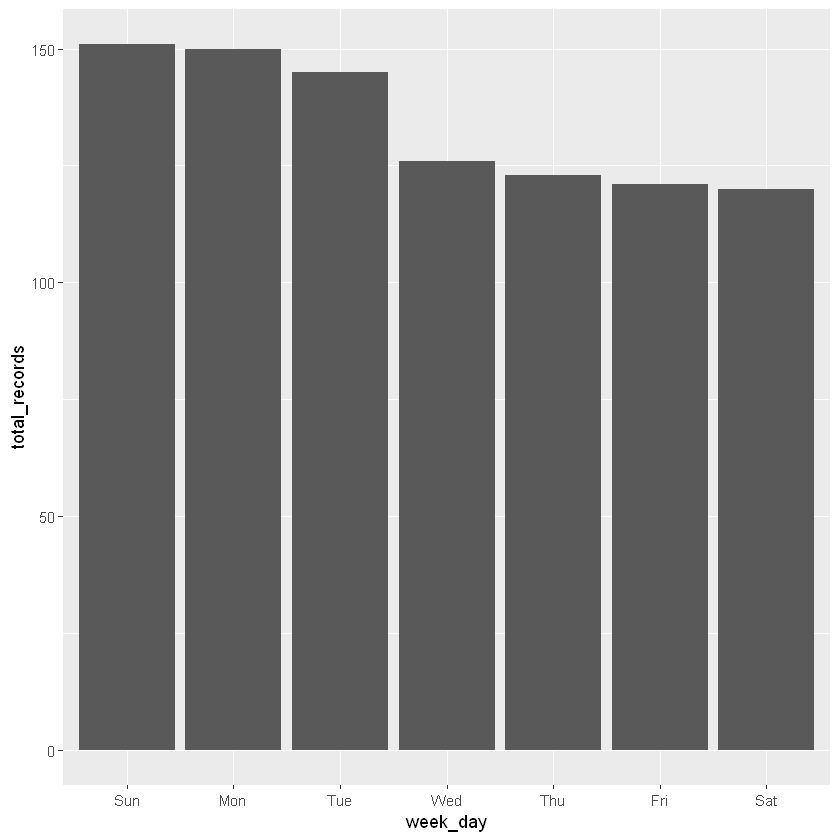

In [268]:
ggplot(data=dailyActivity_day_averages) + geom_col(mapping=aes(x=week_day, y=total_records))

Determining if specific days of the week had more steps:

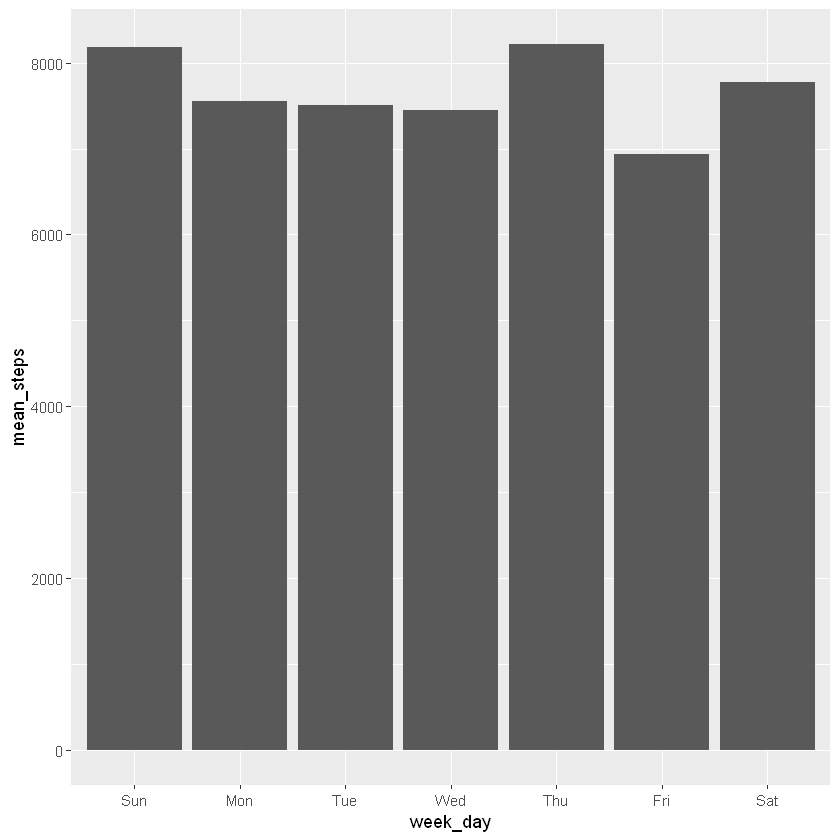

In [273]:
ggplot(data=dailyActivity_day_averages) + geom_col(mapping=aes(x=week_day, y=mean_steps))

Determining if specific days of the week had more calories burned:

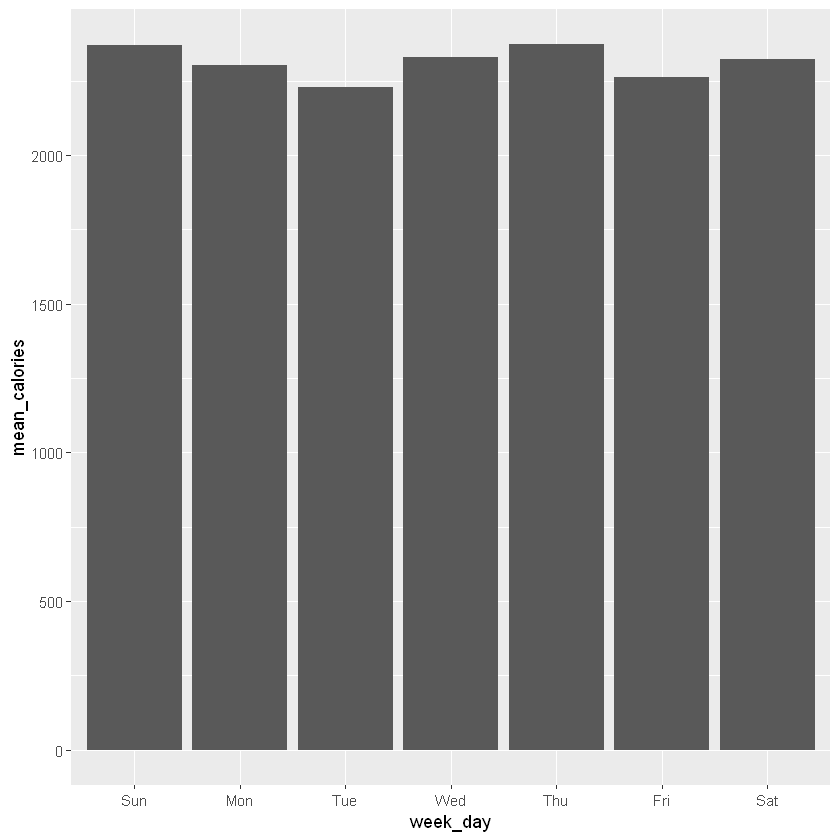

In [274]:
ggplot(data=dailyActivity_day_averages) + geom_col(mapping=aes(x=week_day, y=mean_calories))

Determining the breakdown of very, fairly, lightly and sedentary minutes:

In [ ]:
ggplot(data=dailyActivity_day_averages) + geom_point(mapping=aes(x=Id,y=Calories)) + facet_wrap(~NewDate)

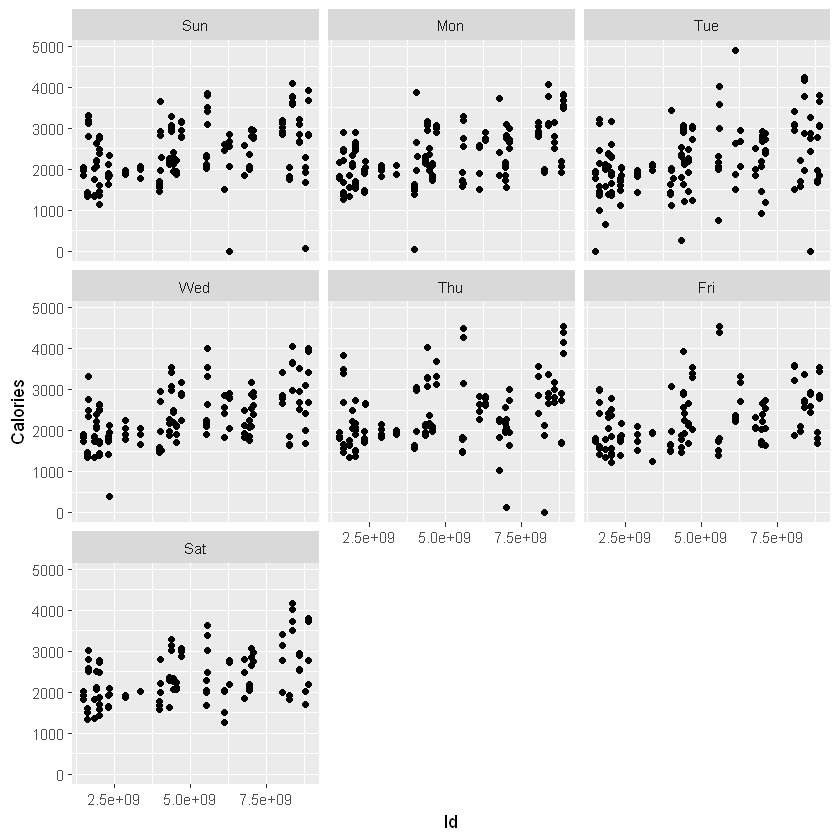

In [187]:
ggplot(data=dailyActivity_merged) + geom_point(mapping=aes(x=Id,y=Calories)) + facet_wrap(~NewDate)

In [223]:
apply(dailyActivity_merged,2,min)

Id             ActivityDate               TotalSteps 
            "1503960366"              "4/12/2016"                  "    0" 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                 " 0.00"                  " 0.00"               "0.000000" 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                 " 0.00"                   "0.00"                  " 0.00" 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                  "0.00"                    "  0"                    "  0" 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                   "  0"                   "   0"                   "   0" 
                 NewDate 
                   "Fri"

In [229]:
filter(dailyActivity_merged, Calories == 0)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,NewDate
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
1503960366,5/12/2016,0,0,0,0,0,0,0,0,0,0,0,1440,0,Tue
6290855005,5/10/2016,0,0,0,0,0,0,0,0,0,0,0,1440,0,Sun
8253242879,4/30/2016,0,0,0,0,0,0,0,0,0,0,0,1440,0,Thu
8583815059,5/12/2016,0,0,0,0,0,0,0,0,0,0,0,1440,0,Tue


In [208]:
glimpse(test)

Rows: 4
Columns: 16
$ Id                       <dbl> 1503960366, 6290855005, 8253242879, 8583815059
$ ActivityDate             <chr> "5/12/2016", "5/10/2016", "4/30/2016", "5/12/~
$ TotalSteps               <dbl> 0, 0, 0, 0
$ TotalDistance            <dbl> 0, 0, 0, 0
$ TrackerDistance          <dbl> 0, 0, 0, 0
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0
$ VeryActiveDistance       <dbl> 0, 0, 0, 0
$ ModeratelyActiveDistance <dbl> 0, 0, 0, 0
$ LightActiveDistance      <dbl> 0, 0, 0, 0
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0
$ VeryActiveMinutes        <dbl> 0, 0, 0, 0
$ FairlyActiveMinutes      <dbl> 0, 0, 0, 0
$ LightlyActiveMinutes     <dbl> 0, 0, 0, 0
$ SedentaryMinutes         <dbl> 1440, 1440, 1440, 1440
$ Calories                 <dbl> 0, 0, 0, 0
$ NewDate                  <ord> Tue, Sun, Thu, Tue


In [235]:
str(dailyActivity_merged)

tibble [940 x 16] (S3: tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 164 233 264 205

In [228]:
sum(is.na(dailyActivity_merged))
sum(duplicated(dailyActivity_merged))

[1] 0

[1] 0

In [231]:
count(dailyActivity_merged, Calories == 0)

Calories == 0,n
<lgl>,<int>
FALSE,936
TRUE,4


In [249]:
rm(list=ls())
